<div dir="rtl">
    <h2>
       فاز سوم پروژه بازیابی اطلاعات - خوشه‌بندی
    </h2>
</div>
<p></p>
<div dir="rtl">
اعضای گروه: حمیدرضا هدایتی، حامد علی‌محمدزاده، آرمین سعادت‌بروجنی
<p></p>
</div>

<div dir="rtl">
    <h3>
       نصب نیازمندی‌های پروژه:
    </h3>
</div>

In [1]:
%cd ../../
%ls

/home/rmool/MIR
classifiers/  data/          IR_files/    __pycache__/      search/
clusterings/  file_handler/  main.py      README.md         venv/
compressor/   helper.py      pagerank/    reports/
crawler/      index/         preprocess/  requirements.txt


In [2]:
!pip install -r requirements.txt
!pip install yellowbrick

<div dir="rtl">
    <h3>
        ایمپورت کردن پکیج‌های مورد نیاز:
    </h3>
</div>

In [3]:
from main import JSON_to_clustering_arrays 
from yellowbrick.cluster import intercluster_distance, kelbow_visualizer
from clusterings import k_means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/rmool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rmool/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div dir="rtl">
    <h3>
       تحلیل اطلاعات فایل جیسون و ایجاد w2v و tf_idf:
    </h3>
<p></p>    
لینک‌ها خوانده و ذخیره می‌شود. تگ‌های اصلی با شماره ۰ تا ۱۳ ذخیره می‌شود.
<p></p>
summery و title با هم ترکیب شده و به فضایTF_IDF و Word2Vec برده می‌شود.
<p></p>
    برای TF_IDF در گام اول بعد فضا برابر تعداد term ها در نظر گرفته می‌شود. در گام بعد با استفاده از PCA کاهش ابعاد صورت می‌گیرد چرا که فاصله در ابعاد بالا مبنای خوبی برای الگوریتم k_means نیست.
<p></p>
    تبدیل Word2Vec توسط کتابخانه موجود با پارامترهای پیش‌فرض انجام می‌شود. تنها پارامتری که باید تعیین شود ابعاد فضا است که عددی زیر ۱۰۰ در نظر گفته می‌شود.
</div>

In [4]:
tf_idf, w2v, tags, links, df = JSON_to_clustering_arrays("./data/phase3/hamshahri.json")

In [5]:
features_dim = 50
random_state = 12
tf_idf = PCA(features_dim, random_state=random_state).fit_transform(tf_idf)

<div dir="rtl">
    <h3>
        بررسی پارامترهای k_means:
    </h3>
    <p></p>
    KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10, max_iter=300)
    <p></p>
    random_state یک عدد دلخواه تعیین می‌شود تا با ثابت ماندن بقیه پارامترها جواب یکسان گرفته شود.
    <p></p>
    در گام اول تعداد خوشه‌ها (n_clusters) تعیین می‌شود.
</div>

<div dir="rtl">
    <h4>
        محاسبه تعداد خوشه‌ها بدون استفاده از tags:
    </h4>
    <p></p>
    نمودار تابع هزینه (مجموع مجذور فاصله هر نقطه از مرکز) بر حسب تعداد خوشه‌ها رسم می‌شود.
</div>

In [6]:
# inertia_tfidf = []
# for i in range(2, 20):
#     inertia_tfidf.append(k_means.get_cost(tf_idf, random_state=random_state, n_clusters=i))
# print('TF-IDF:')
# ax = sns.lineplot(x=range(2, 20), y=inertia_tfidf);
# ax.set(xlabel='n_clusters', ylabel='inertia')
# plt.show()

# inertia_w2v = []
# for i in range(2, 20):
#     inertia_w2v.append(k_means.get_cost(w2v, random_state=random_state, n_clusters=i))
# print('W2v:')
# ax = sns.lineplot(x=range(2, 20), y=inertia_w2v);
# ax.set(xlabel='n_clusters', ylabel='inertia')
# plt.show()

<div dir="rtl">
    همانطور که انتظار میرفت با افزایش تعداد خوشه‌ها، هزینه کمتر شد. اما به دنبال نقطه‌ای هستیم که کاهش معناداری داشته باشد که از نمودارهای بالا به دست نیامد.
<p></p>
    برای دقت بیشتر و در نظر گرفتن زمان مورد نیاز برای رسیدن به جواب، میتوان از  Elbow method استفاده کرد.
</div>

In [7]:
# print('TF_IDF:')
# _ = kelbow_visualizer(KMeans(random_state=random_state), tf_idf, k=(2,16), metric='silhouette');
# print('Word2Vec:')
# _ = kelbow_visualizer(KMeans(random_state=random_state), w2v, k=(2,16), metric='silhouette');

<div dir="rtl">
    بنابراین تعداد خوشه‌ها در هر دو روش ۵ به دست آمد.
<p></p>
    با مقدار پیش‌فرض پارامترهای KMeans خوشه‌بندی را انجام داده و نتایج ارزیابی را نمایش می‌دهیم. 
</div>

In [8]:
k_means.get_evaluation_dataframe(tf_idf, w2v, tags, 5, 5)

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.290513,0.114225,0.121537,-0.00075,431.672184
w2v,0.494326,0.361085,0.365353,0.20004,318.773218


<div dir="rtl">
    برای افزایش کیفیت خوشه‌بندی، میتوان تعداد ابعاد را کمی بیشتر کرد.
    <p></p>
    در مورد w2v، با افزایش بعد مقدار epoches نیز از ۱۰ به ۳۲ افزایش یافت تا ویژگی‌های جدید بهتر آموخته شوند.
    <p></p>
    مشابه این فرایند برای tf_idf نیز اعمال شد. فضا از ۵۰ به ۴۰۰ تغییر یافت و برای رسیدن به نتیجه مطلوب تعداد حالات بیشتری (با randomness بیشتر ) بررسی شد.
</div>

In [9]:
enhansed_tfidf, enhansed_w2v, tags, links, df = JSON_to_clustering_arrays("./data/phase3/hamshahri.json", tf_idf_features=1000, w2v_min_count=2, w2v_epochs=32, w2v_vector_size=128)

In [10]:
features_dim = 400
enhansed_tfidf = PCA(features_dim, random_state=random_state).fit_transform(enhansed_tfidf)

In [11]:
results, best_random_tfidf, best_random_w2v = k_means.get_advanced_results(enhansed_tfidf, enhansed_w2v, tags, 5, 5)
results

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.382660,0.241917,0.247642,0.049169,1614.210608
w2v,0.514299,0.433119,0.436891,0.273068,6204.948116


<div dir="rtl">
    همانطور که مشاهده می‌شود نتایج به شکل معناداری بهبود یافت. دلیل اصلی این بهبود افزایش بعد نیست بلکه اجرای الگوریتم با نقاط شروع متفاوت و با random_state های متفاوت است که باعث می‌شود نقاط بهینه محلی بیشتری را بررسی کرده و بهترین آن‌ها را به عنوان بهینه اصلی انتخاب کند.
    <p></p><p></p>
    در زیر خوشه‌ها بر اساس رنگ مشخص شده‌اند. این نمایش بر حسب ۲ ویژگی بارز شناسایی شده توسط PCA است.
</div>

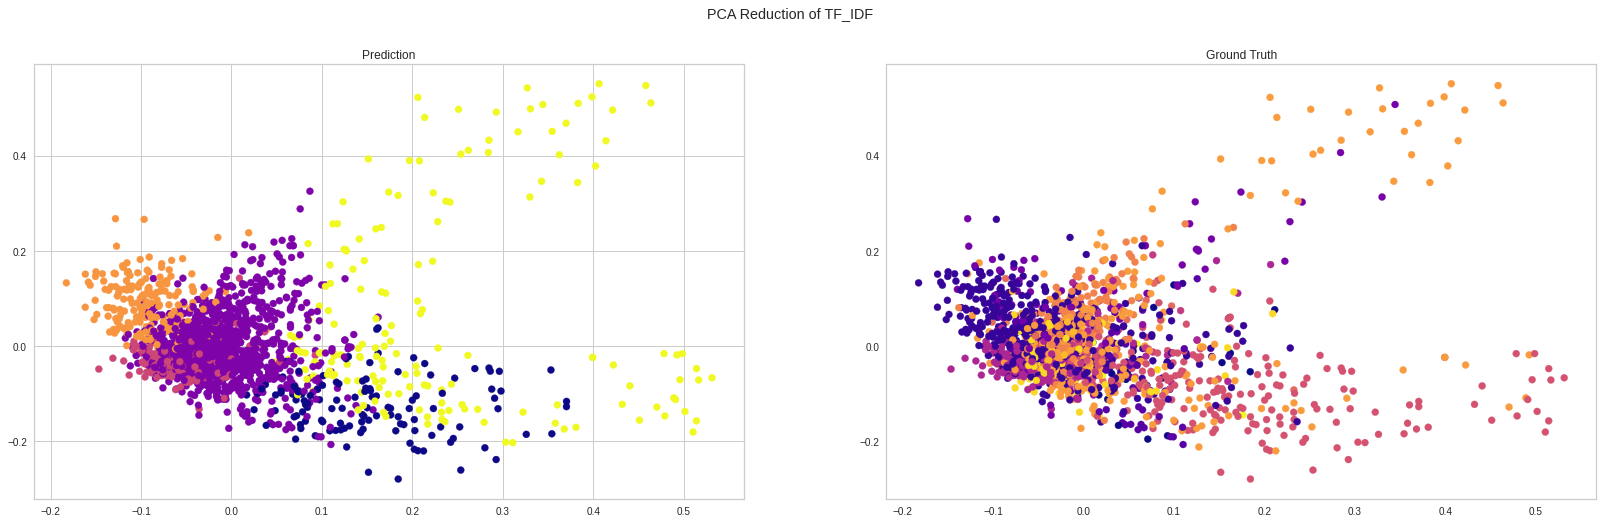

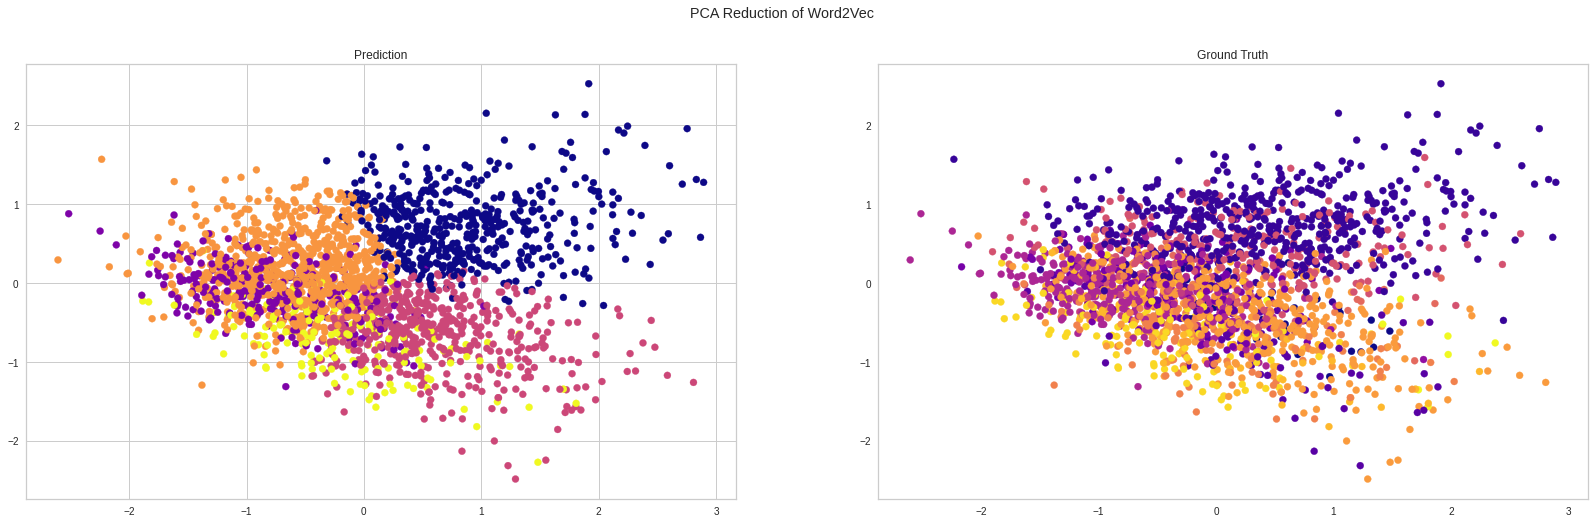

In [12]:
# k_means.PCA2_plot(enhansed_tfidf, 5, best_random_tfidf, tags, "PCA Reduction of TF_IDF")
# k_means.PCA2_plot(enhansed_w2v, 5, best_random_w2v, tags, "PCA Reduction of Word2Vec")

<div dir="rtl">
    موقعیت خوشه‌ها نسبت به هم با معیار فاصله بین خوشه‌ای به شکل زیر است:
</div>

TF_IDF:


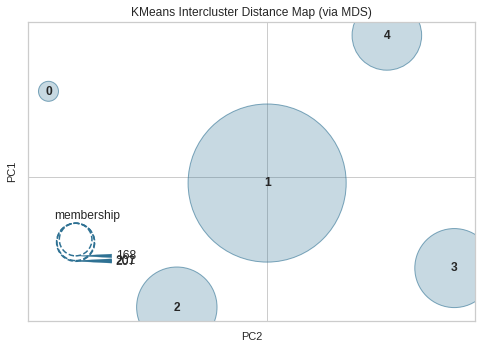

Word2Vec:


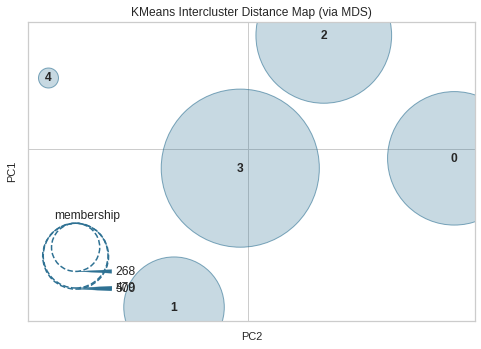

In [13]:
# print('TF_IDF:')
# _ = intercluster_distance(KMeans(n_clusters=5, random_state=best_random_tfidf), enhansed_tfidf)
# print('Word2Vec:')
# _ = intercluster_distance(KMeans(n_clusters=5, random_state=best_random_w2v), enhansed_w2v)

<div dir="rtl">
    <h4>
        محاسبه تعداد خوشه‌ها با استفاده از tags:
    </h4>
    <p></p>
    دسته‌های اصلی به عنوان ground truth استفاده می‌شوند. تعداد این دسته‌ها ۱۴ تاست پس تعداد خوشه‌ها برابر ۱۴ هم امتحان می‌کنیم.
</div>

In [14]:
k_means.get_evaluation_dataframe(tf_idf, w2v, tags, 14, 14)

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.469360,0.280925,0.294606,0.104216,353.467633
w2v,0.560145,0.371778,0.382440,0.197059,173.522793


In [15]:
results, best_random_tfidf, best_random_w2v = k_means.get_advanced_results(tf_idf, enhansed_w2v, tags, 14, 14)
results

,Purity,Adjusted Mutual Info,Normalized Mutual Info,Adjusted Rand Index,Inertia
tf_idf,0.474353,0.287757,0.300890,0.102612,354.817662
w2v,0.783023,0.625207,0.631578,0.415978,4610.538324


<div dir="rtl">
    مشاهده می‌شود که عملکرد خوشه‌بندی با ۱۴ خوشه بهبود می‌یابد.
</div>

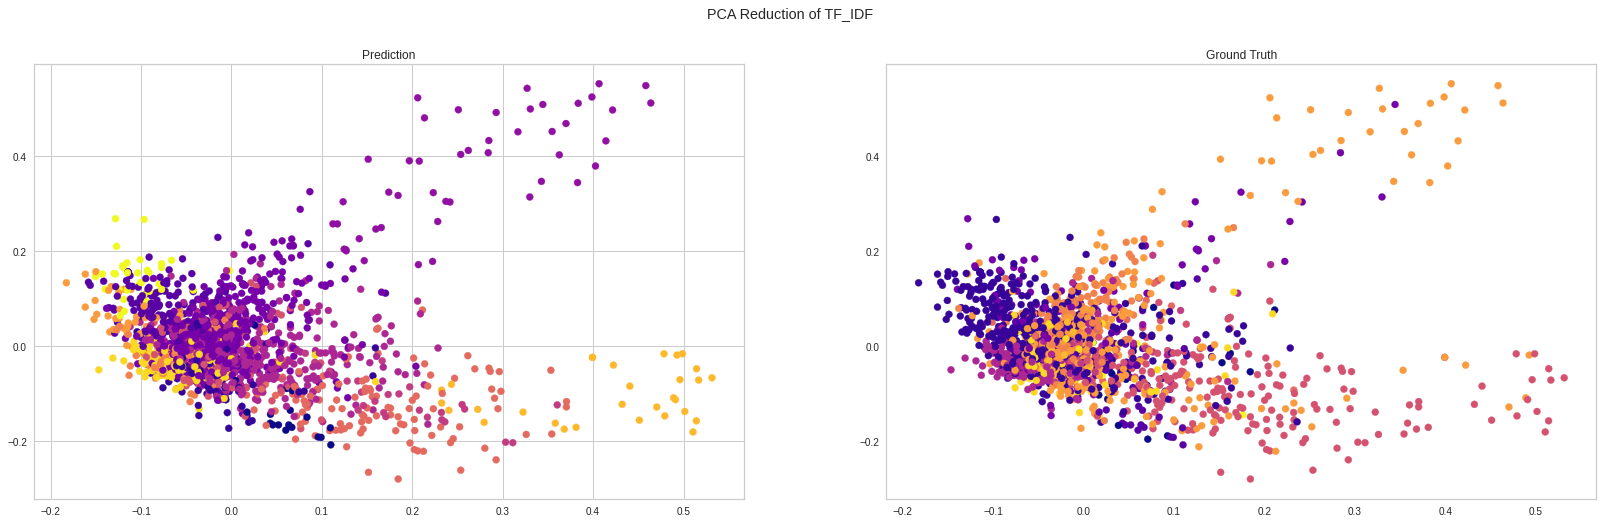

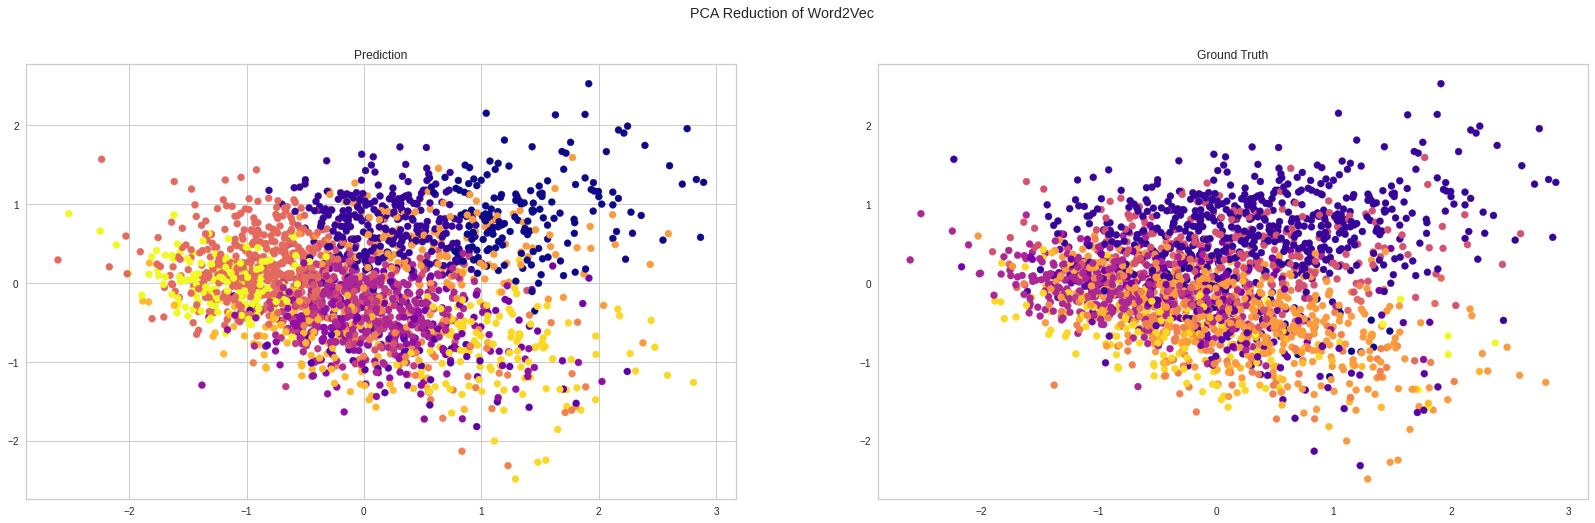

In [16]:
# k_means.PCA2_plot(tf_idf, 14, best_random_tfidf, tags, "PCA Reduction of TF_IDF")
# k_means.PCA2_plot(enhansed_w2v, 14, best_random_w2v, tags, "PCA Reduction of Word2Vec")

TF_IDF:


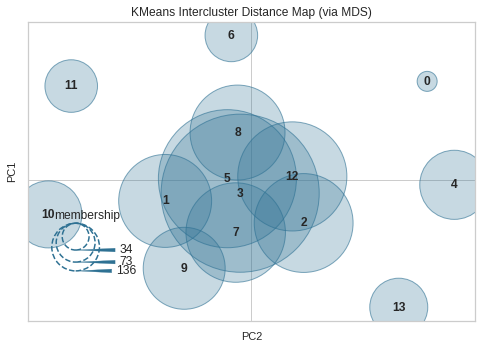

Word2Vec:


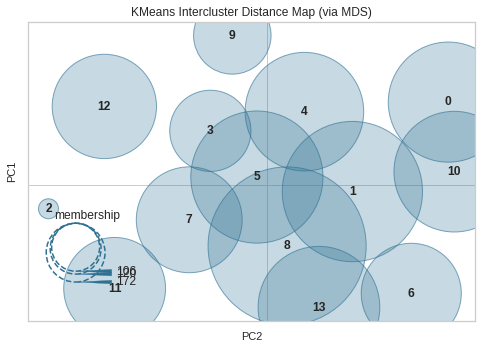

In [17]:
# print('TF_IDF:')
# _ = intercluster_distance(KMeans(n_clusters=14, random_state=best_random_tfidf), tf_idf)
# print('Word2Vec:')
# _ = intercluster_distance(KMeans(n_clusters=14, random_state=best_random_w2v), enhansed_w2v)

<div dir="rtl">
    همانطور که از نمودار بالا برداشت می‌شود، روش w2v خیلی بهتر خوشه‌ها را از هم تفکیک کرده است.
</div>

<div dir="rtl">
    <h4>
        بررسی سایر پارامترها: n_init و max_iter
    </h4>
    <p></p>
    تا اینجا این مقادیر به صورت پیش‌فرض به ترتیب ۱۰ و ۳۰۰ بوده‌اند.
    <p></p>
    n_init تعداد بارهایی است که به ازای هر بار صدا زدن تابع KMeans الگوریتم انجام شده و بهترین جواب بازگردانده می‌شود.
    <p></p>
    max_iter حداکثر تعداد مراحلی است که در هر بار اجرای الگوریتم طی می‌شود.
    <p></p>
    <h5>
        بررسی n_init:
    </h5>
</div>

In [18]:
k_means.evaluate_n_init(tf_idf, enhansed_w2v, tags, 14, 14, best_random_tfidf, best_random_w2v, [5, 10, 20, 30])    

<div dir="rtl">
    همانطور که ملاحظه شد n_init تاثیر چندانی در نتیجه کار ندارد. البته
    <p></p>
    <h5>
        بررسی max_iter:
    </h5>
</div>

In [ ]:
k_means.evaluate_max_iter(tf_idf, enhansed_w2v, tags, 14, 14, best_random_tfidf, best_random_w2v, [50, 100, 300, 500])    